In [5]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\green\OneDrive\Documents\DataScience\Presentation\data_files\cleaned_data\advanced_player_stats.csv'
df = pd.read_csv(file_path)

# Check for missing values or non-numeric columns
df.isnull().sum()  # Check for missing values
df.dtypes  # Check column types

# Drop unnecessary columns if any
df = df.drop(columns=['Unnamed: 0'])  # Adjust based on your dataset


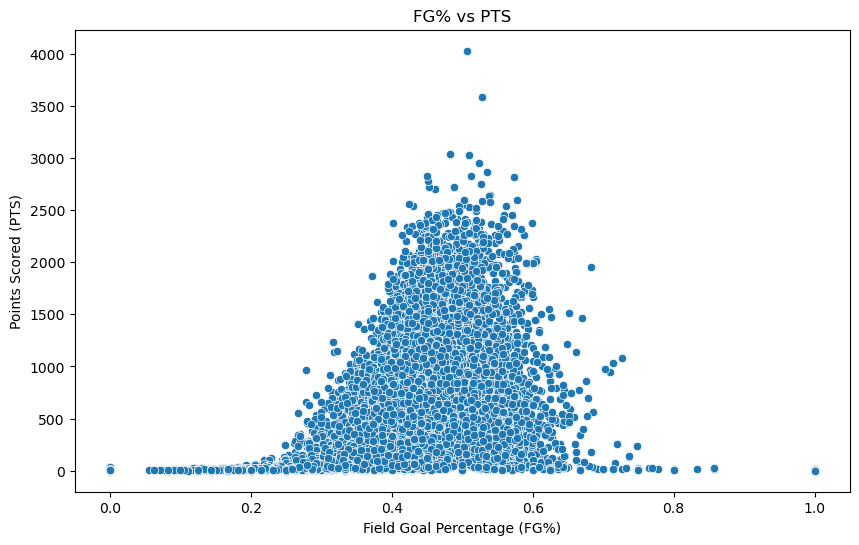

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert percentage columns to numeric, if needed
df['FG%'] = pd.to_numeric(df['FG%'], errors='coerce')
df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')

# Scatter plot for FG% vs PTS
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='FG%', y='PTS')
plt.title('FG% vs PTS')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Points Scored (PTS)')
plt.show()


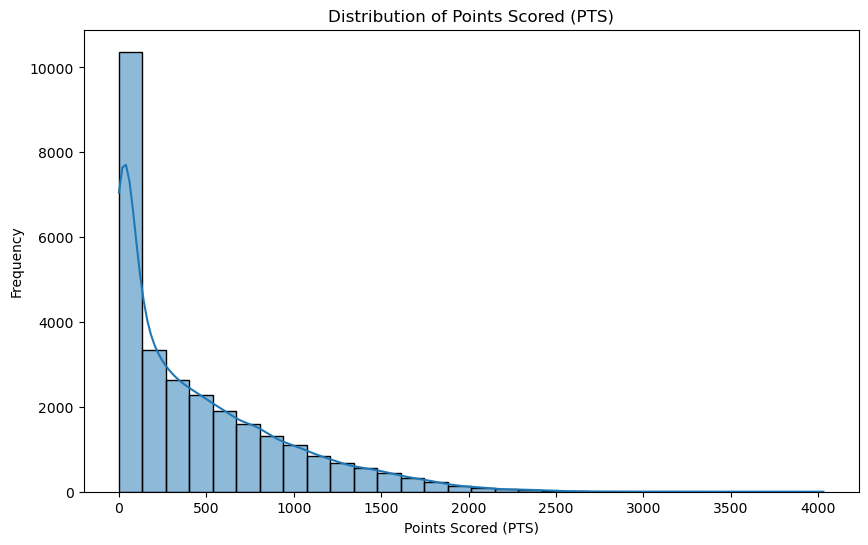

In [9]:
# Histogram for PTS (Points)
plt.figure(figsize=(10, 6))
sns.histplot(df['PTS'], kde=True, bins=30)
plt.title('Distribution of Points Scored (PTS)')
plt.xlabel('Points Scored (PTS)')
plt.ylabel('Frequency')
plt.show()


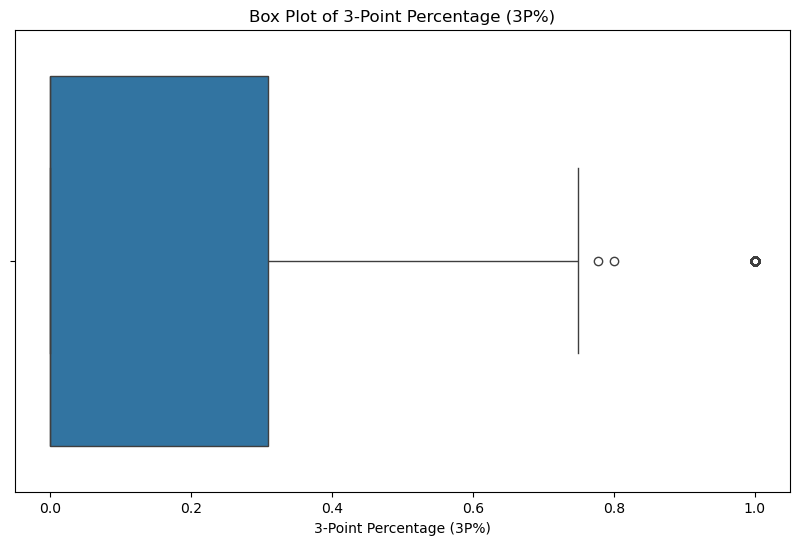

In [11]:
# Box plot for 3P% (3-Point Percentage)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='3P%')
plt.title('Box Plot of 3-Point Percentage (3P%)')
plt.xlabel('3-Point Percentage (3P%)')
plt.show()


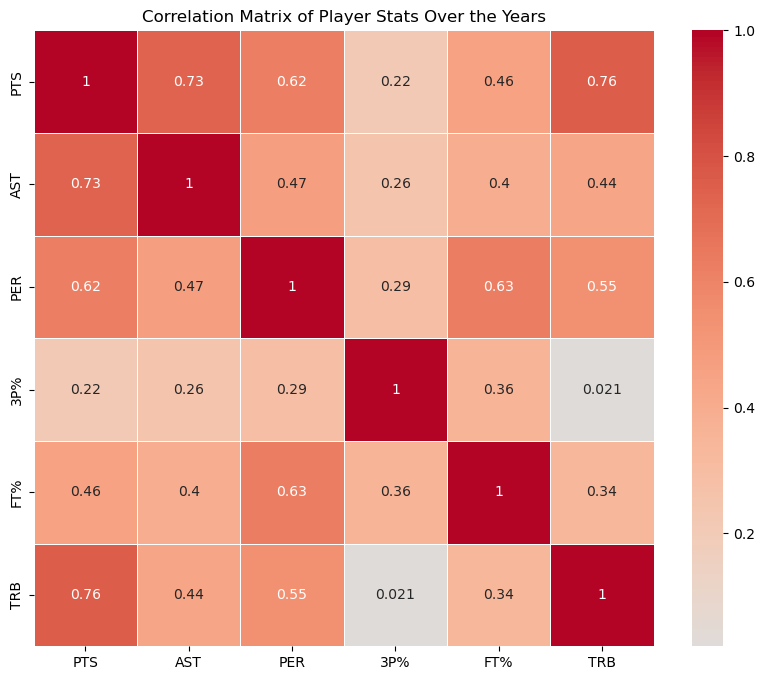

In [35]:
#Shows the correlation matrix for the correlation between stats, like how a player who averages more
#pts and assits could mean a player like a playermaker PG. Meaning they are usually key players that impact the gam
import seaborn as sns
import matplotlib.pyplot as plt

# Select the stats you want to compare (e.g., PTS, AST, PER, 3P%)
stats = ['PTS', 'AST', 'PER', '3P%', 'FT%', 'TRB']
df_stats = df[stats]

# Calculate the correlation matrix
corr_matrix = df_stats.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix of Player Stats Over the Years')
plt.show()


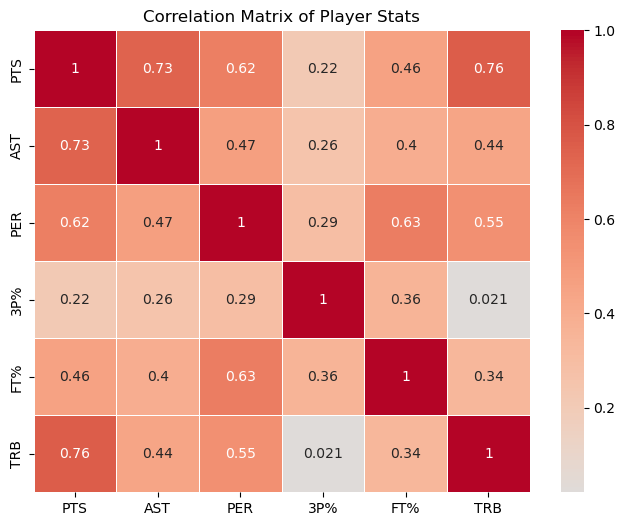

Correlation Matrix for Heatmap:
          PTS       AST       PER       3P%       FT%       TRB
PTS  1.000000  0.734473  0.624486  0.218100  0.456077  0.760832
AST  0.734473  1.000000  0.474097  0.257639  0.397574  0.441033
PER  0.624486  0.474097  1.000000  0.293491  0.631365  0.545139
3P%  0.218100  0.257639  0.293491  1.000000  0.356979  0.020635
FT%  0.456077  0.397574  0.631365  0.356979  1.000000  0.340832
TRB  0.760832  0.441033  0.545139  0.020635  0.340832  1.000000


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `corr_matrix` has already been calculated
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Player Stats')
plt.show()

# Print the correlation matrix for the heatmap
print("Correlation Matrix for Heatmap:")
print(corr_matrix)


In [37]:
print("line graphs for trends in player statistics over the years")

line graphs for trends in player statistics over the years


In [39]:
# List of key stats to track over time
stats = ['3P%', 'VORP', 'eFG%', 'TOV', 'PF', 'AST%', 'TS%', 'USG%', 'FTA']

# Group the data by Year and calculate the mean for each statistic
df_grouped = df.groupby('Year')[stats].mean().reset_index()

# Print grouped data
print(df_grouped.head())


   Year  3P%  VORP      eFG%  TOV          PF  AST%       TS%  USG%  \
0     0  0.0   0.0  0.000000  0.0    0.000000   0.0  0.000000   0.0   
1  1950  0.0   0.0  0.318109  0.0  114.990385   0.0  0.384032   0.0   
2  1951  0.0   0.0  0.332741  0.0  123.494253   0.0  0.399908   0.0   
3  1952  0.0   0.0  0.344500  0.0  144.523077   0.0  0.411923   0.0   
4  1953  0.0   0.0  0.336775  0.0  142.218750   0.0  0.409931   0.0   

          FTA  
0    0.000000  
1  138.756410  
2  148.247126  
3  179.076923  
4  174.618750  


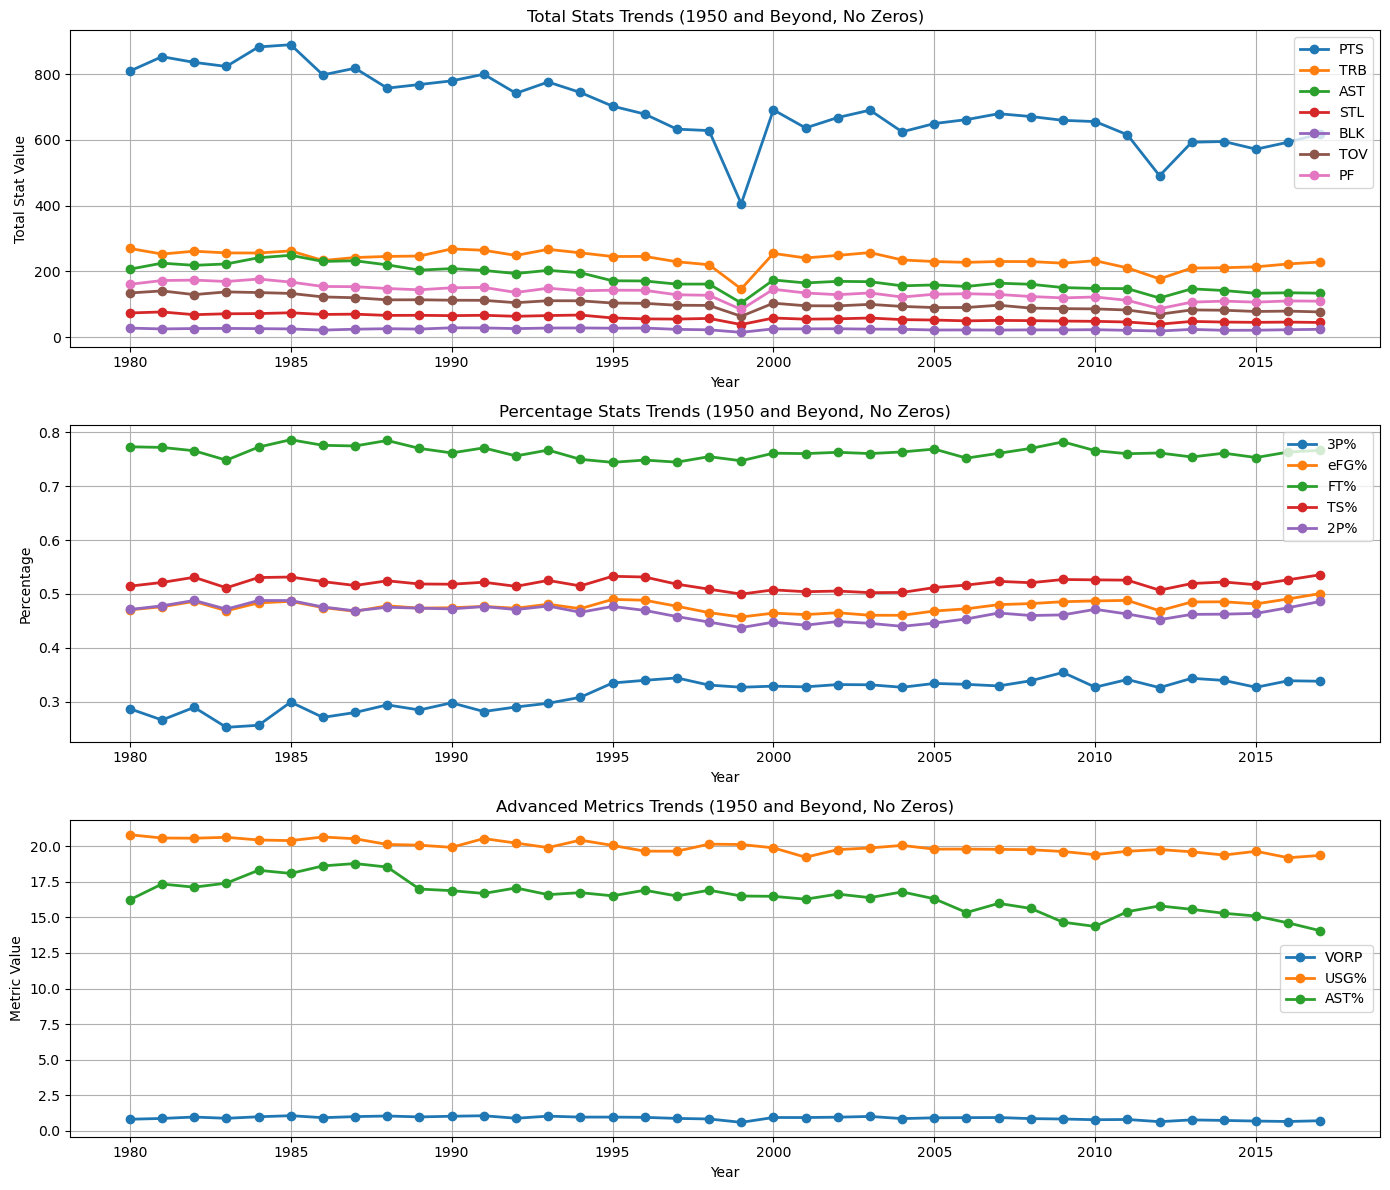

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/green/OneDrive/Documents/DataScience/Presentation/data_files/cleaned_data/advanced_player_stats.csv')

# Filter data for years >= 1950
df = df[df['Year'] >= 1950]

# List of key stats to track over time
totals = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']  # Total Stats
percents = ['3P%', 'eFG%', 'FT%', 'TS%', '2P%']  # Percentage Stats
advanced = ['VORP', 'USG%', 'AST%']  # Advanced Stats

# Remove rows where any of the stats have a value of 0
df = df[df[totals + percents + advanced].ne(0).all(axis=1)]

# Group the data by Year and calculate the mean for each statistic
df_grouped = df.groupby('Year')[totals + percents + advanced].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 12))

# Create subplots for each group of stats
# 1. Totals Stats
plt.subplot(3, 1, 1)  # 3 rows, 1 column, first subplot
for stat in totals:
    plt.plot(df_grouped['Year'], df_grouped[stat], label=stat, marker='o', linestyle='-', linewidth=2)
plt.title('Total Stats Trends (1950 and Beyond, No Zeros)')
plt.xlabel('Year')
plt.ylabel('Total Stat Value')
plt.grid(True)
plt.legend()

# 2. Percentage Stats
plt.subplot(3, 1, 2)  # 3 rows, 1 column, second subplot
for stat in percents:
    plt.plot(df_grouped['Year'], df_grouped[stat], label=stat, marker='o', linestyle='-', linewidth=2)
plt.title('Percentage Stats Trends (1950 and Beyond, No Zeros)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.grid(True)
plt.legend()

# 3. Advanced Metrics Stats
plt.subplot(3, 1, 3)  # 3 rows, 1 column, third subplot
for stat in advanced:
    plt.plot(df_grouped['Year'], df_grouped[stat], label=stat, marker='o', linestyle='-', linewidth=2)
plt.title('Advanced Metrics Trends (1950 and Beyond, No Zeros)')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.grid(True)
plt.legend()

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


    Year         PTS         TRB         AST        STL        BLK  \
0   1980  808.952381  269.738095  206.714286  73.589286  27.577381   
1   1981  852.868966  252.682759  225.020690  76.689655  25.062069   
2   1982  835.544304  261.443038  218.392405  68.379747  26.278481   
3   1983  823.159236  256.152866  222.624204  71.127389  26.605096   
4   1984  882.449664  255.932886  241.463087  71.691275  25.946309   
5   1985  889.216783  262.349650  248.944056  74.202797  25.069930   
6   1986  797.481250  233.168750  230.250000  69.075000  21.487500   
7   1987  817.708075  242.105590  232.335404  69.956522  24.229814   
8   1988  757.196721  245.513661  219.819672  66.136612  25.737705   
9   1989  768.165094  246.669811  203.816038  66.476415  24.617925   
10  1990  779.300429  268.317597  208.459227  65.433476  28.424893   
11  1991  799.422907  264.299559  202.938326  66.537445  28.180617   
12  1992  741.584034  248.537815  193.411765  63.441176  26.000000   
13  1993  775.829694

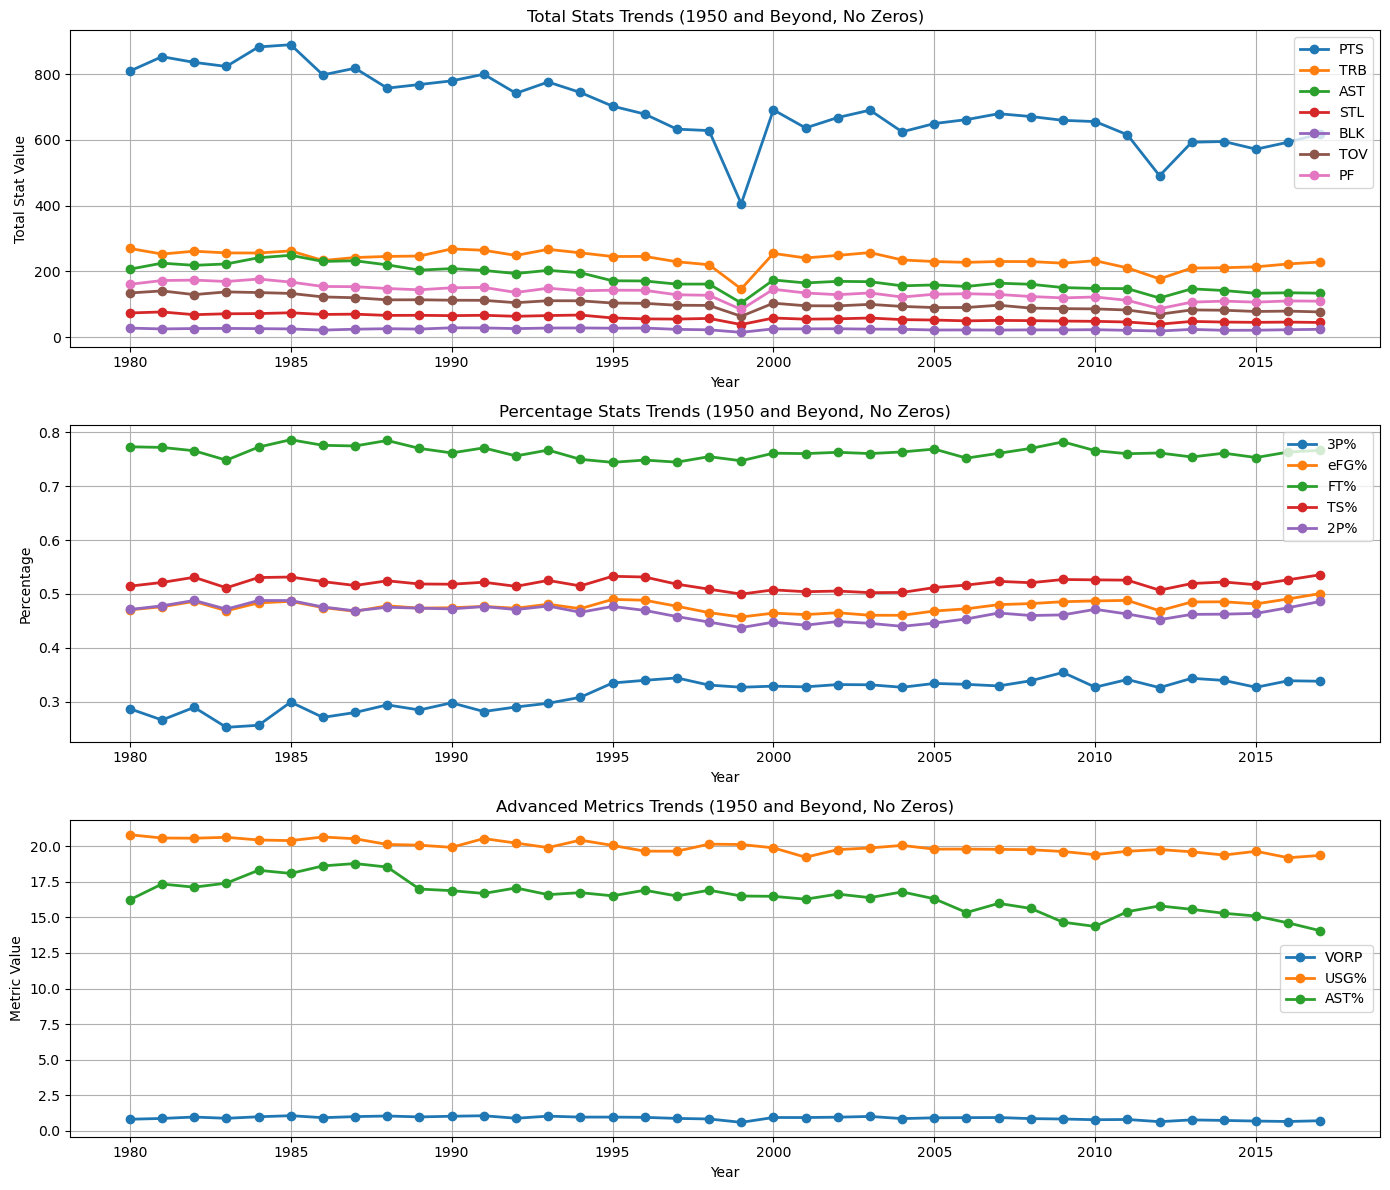

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/green/OneDrive/Documents/DataScience/Presentation/data_files/cleaned_data/advanced_player_stats.csv')

# Filter data for years >= 1950
df = df[df['Year'] >= 1950]

# List of key stats to track over time
totals = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']  # Total Stats
percents = ['3P%', 'eFG%', 'FT%', 'TS%', '2P%']  # Percentage Stats
advanced = ['VORP', 'USG%', 'AST%']  # Advanced Stats

# Remove rows where any of the stats have a value of 0
df = df[df[totals + percents + advanced].ne(0).all(axis=1)]

# Group the data by Year and calculate the mean for each statistic
df_grouped = df.groupby('Year')[totals + percents + advanced].mean().reset_index()

# Print the grouped data to inspect it
print(df_grouped)

# Plotting (same as before)
plt.figure(figsize=(14, 12))

# Create subplots for each group of stats
# 1. Totals Stats
plt.subplot(3, 1, 1)  # 3 rows, 1 column, first subplot
for stat in totals:
    plt.plot(df_grouped['Year'], df_grouped[stat], label=stat, marker='o', linestyle='-', linewidth=2)
plt.title('Total Stats Trends (1950 and Beyond, No Zeros)')
plt.xlabel('Year')
plt.ylabel('Total Stat Value')
plt.grid(True)
plt.legend()

# 2. Percentage Stats
plt.subplot(3, 1, 2)  # 3 rows, 1 column, second subplot
for stat in percents:
    plt.plot(df_grouped['Year'], df_grouped[stat], label=stat, marker='o', linestyle='-', linewidth=2)
plt.title('Percentage Stats Trends (1950 and Beyond, No Zeros)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.grid(True)
plt.legend()

# 3. Advanced Metrics Stats
plt.subplot(3, 1, 3)  # 3 rows, 1 column, third subplot
for stat in advanced:
    plt.plot(df_grouped['Year'], df_grouped[stat], label=stat, marker='o', linestyle='-', linewidth=2)
plt.title('Advanced Metrics Trends (1950 and Beyond, No Zeros)')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.grid(True)
plt.legend()

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


In [55]:
print("seperate graphs to analyze specific stat trends to help visualize trends")

seperate graphs to analyze specific stat trends to help visualize trends


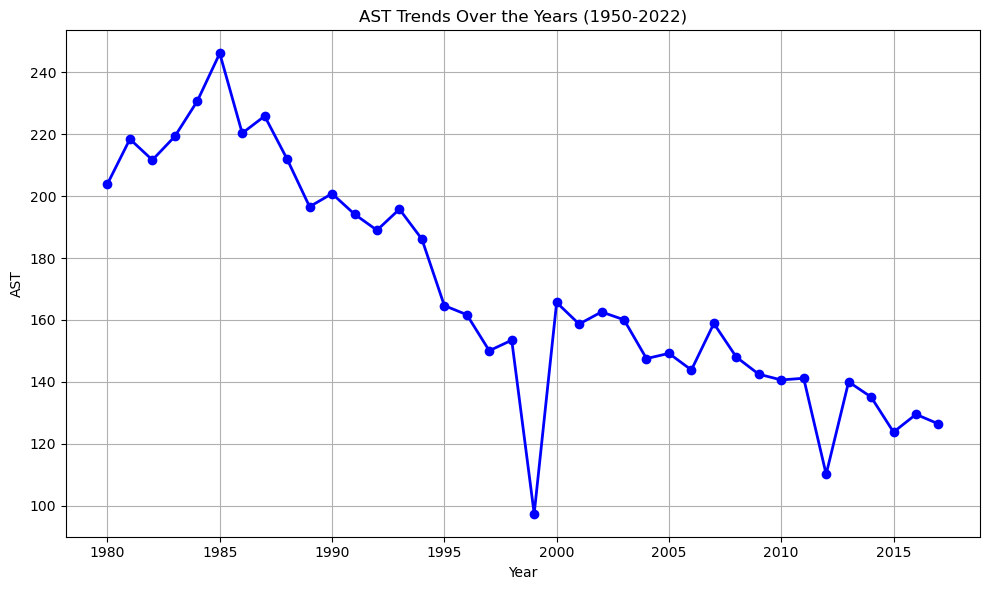

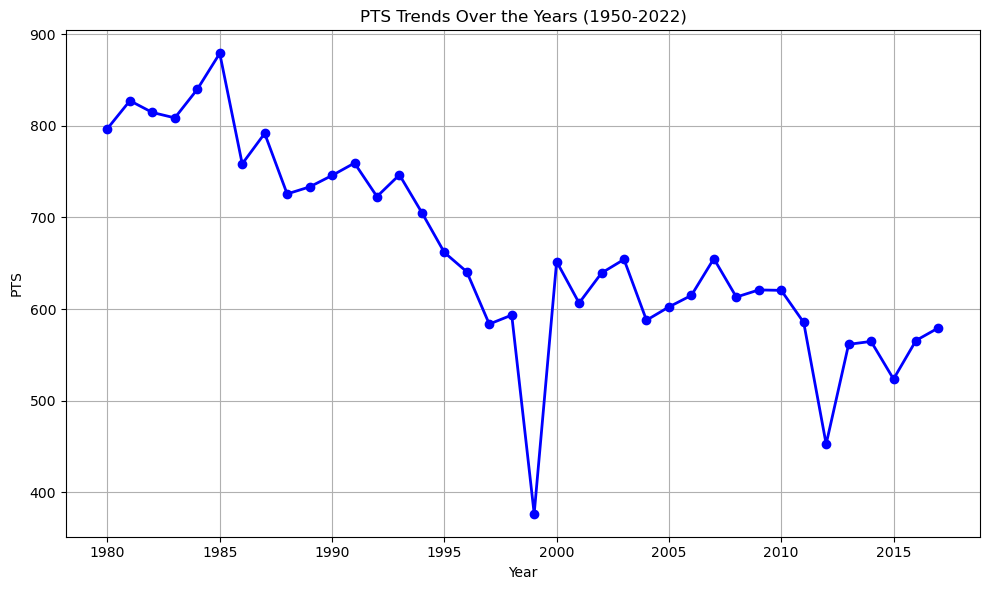

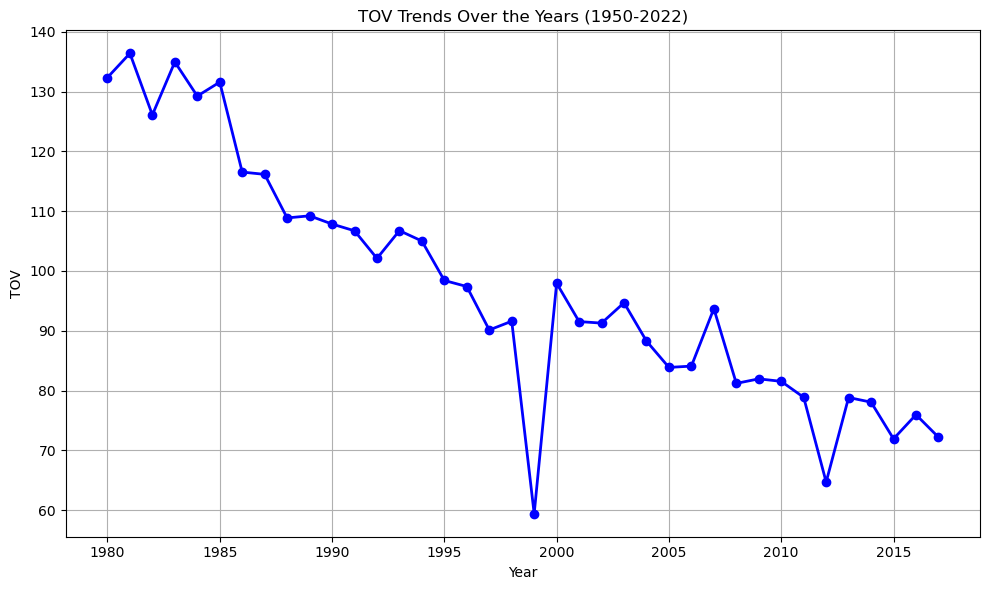

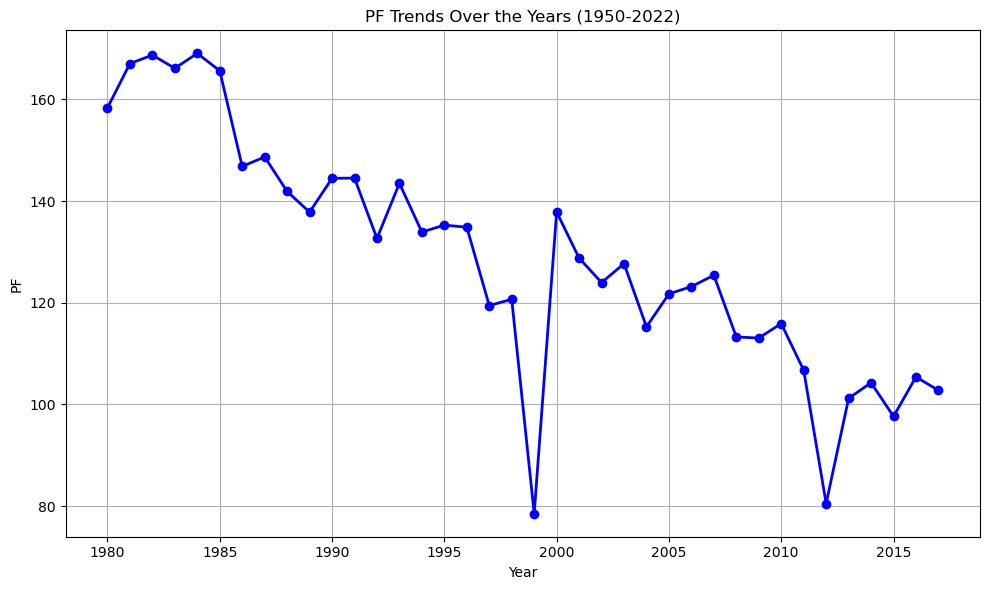

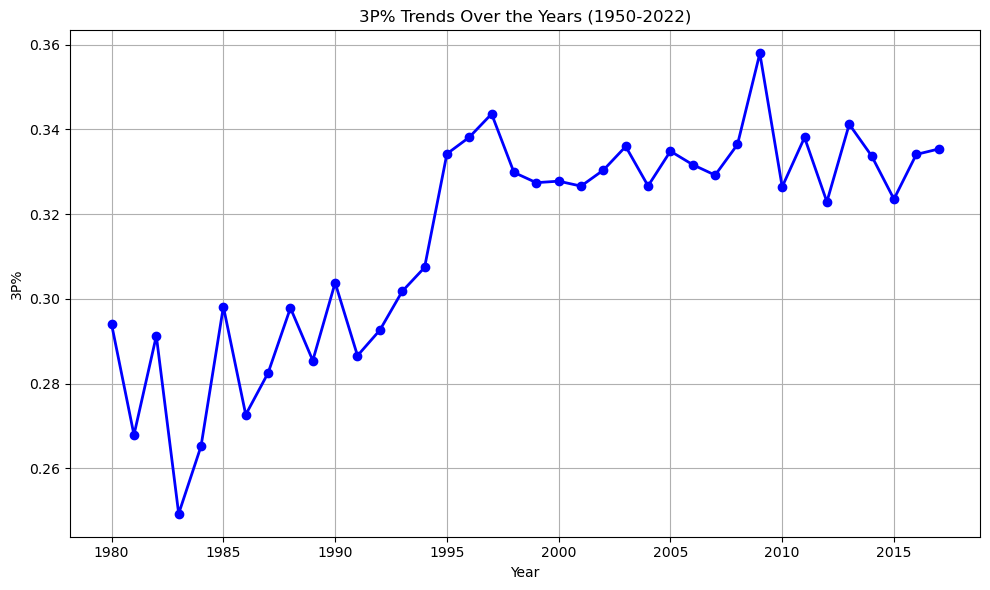

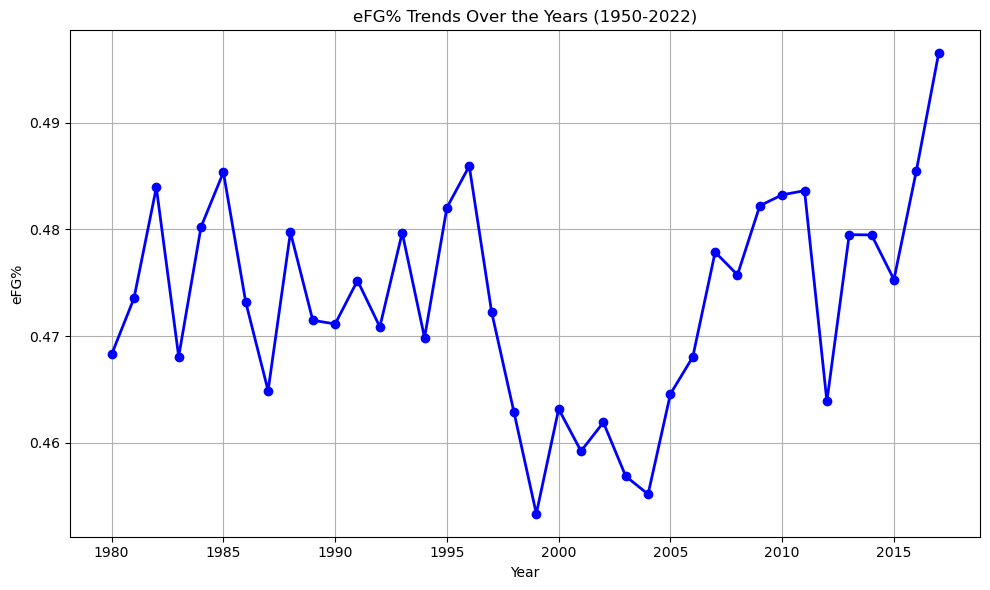

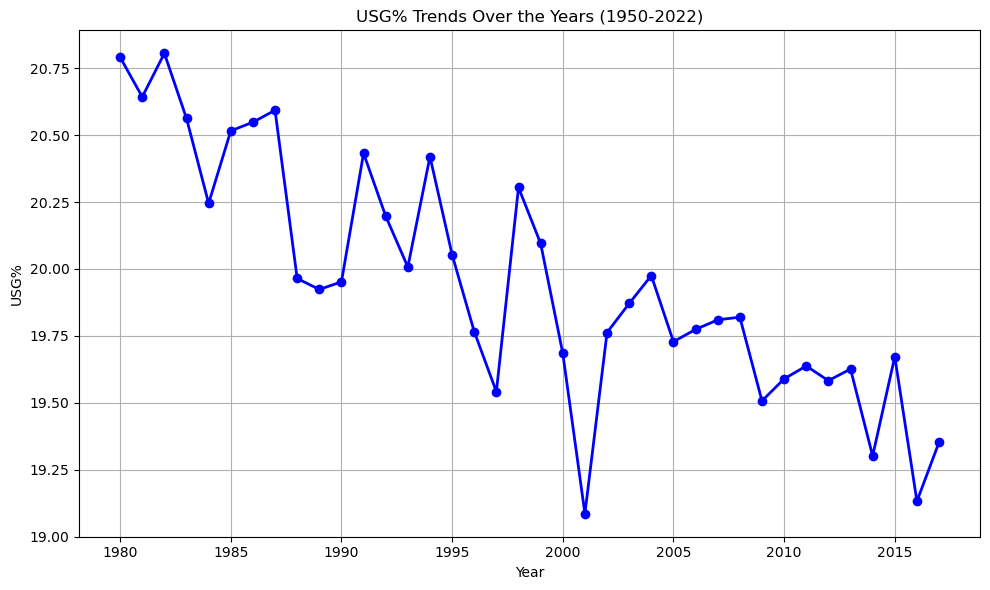

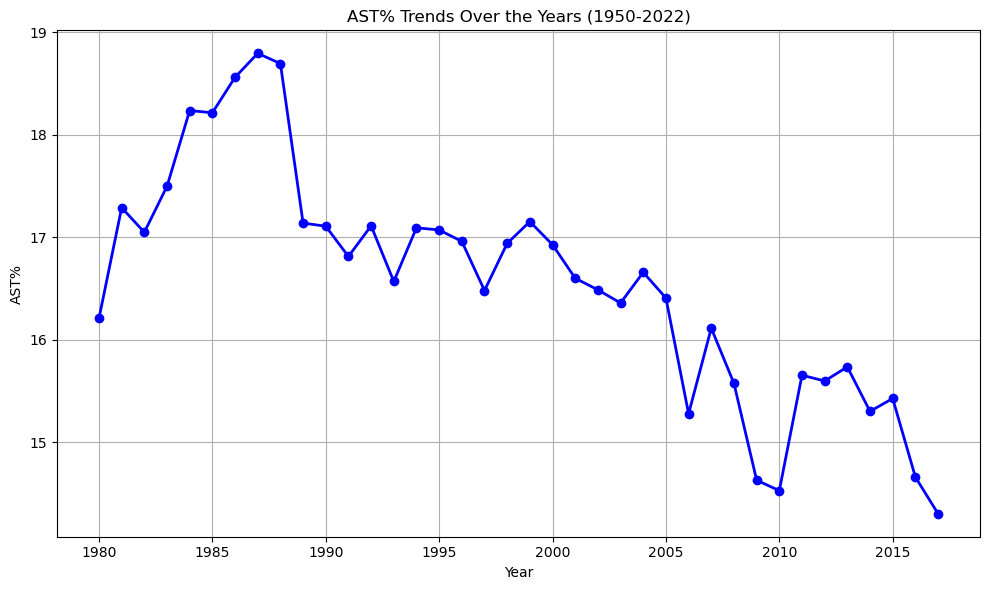

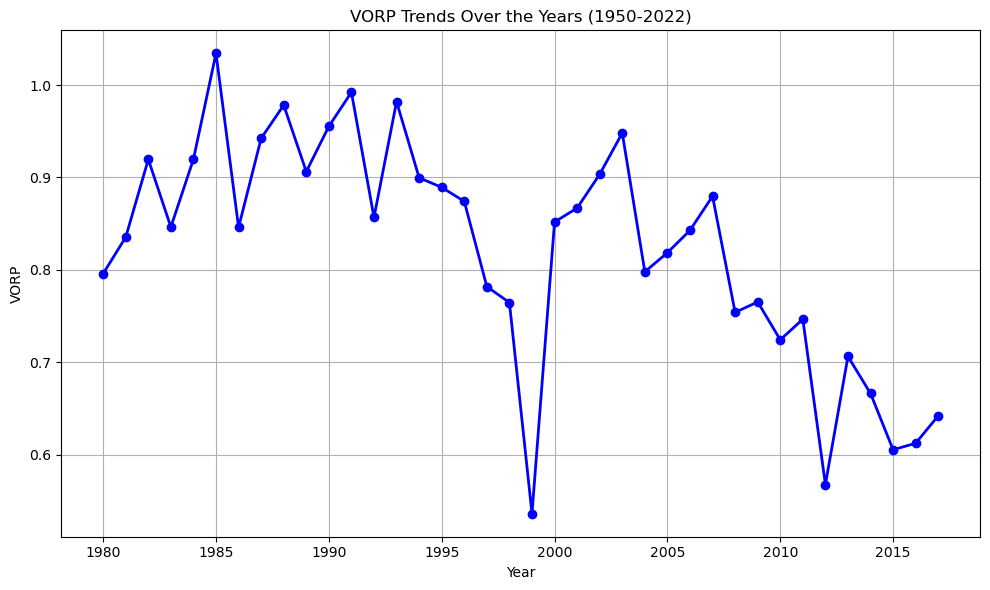

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/green/OneDrive/Documents/DataScience/Presentation/data_files/cleaned_data/advanced_player_stats.csv')

# Filter data for years >= 1950 and <= 2022
df = df[(df['Year'] >= 1950) & (df['Year'] <= 2022)]

# List of key stats to track over time
stats = ['AST', 'PTS', 'TOV', 'PF', '3P%', 'eFG%', 'USG%', 'AST%', 'VORP']

# Remove rows where any of the selected stats have a value of 0
df = df[df[stats].ne(0).all(axis=1)]

# Group the data by Year and calculate the mean for each statistic
df_grouped = df.groupby('Year')[stats].mean().reset_index()

# Plotting each stat individually
for stat in stats:
    plt.figure(figsize=(10, 6))
    plt.plot(df_grouped['Year'], df_grouped[stat], marker='o', linestyle='-', linewidth=2, color='blue')
    plt.title(f'{stat} Trends Over the Years (1950-2022)')
    plt.xlabel('Year')
    plt.ylabel(stat)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [59]:
print("see data")


see data


In [61]:
import pandas as pd

# Load dataset
df = pd.read_csv('C:/Users/green/OneDrive/Documents/DataScience/Presentation/data_files/cleaned_data/advanced_player_stats.csv')

# Filter for years 1950–2022
df = df[(df['Year'] >= 1950) & (df['Year'] <= 2022)]

# Selected stats to summarize
stats = ['AST', 'PTS', 'TOV', 'PF', '3P%', 'eFG%', 'USG%', 'AST%', 'VORP']

# Remove rows with zero in any of the selected stats
df = df[df[stats].ne(0).all(axis=1)]

# Group by year and compute mean
yearly_stats = df.groupby('Year')[stats].mean().round(2)

# Print the results
for year, row in yearly_stats.iterrows():
    print(f"\nYear: {year}")
    for stat in stats:
        print(f"  {stat}: {row[stat]}")



Year: 1980
  AST: 203.92
  PTS: 796.85
  TOV: 132.36
  PF: 158.33
  3P%: 0.29
  eFG%: 0.47
  USG%: 20.79
  AST%: 16.21
  VORP: 0.8

Year: 1981
  AST: 218.4
  PTS: 827.24
  TOV: 136.4
  PF: 167.03
  3P%: 0.27
  eFG%: 0.47
  USG%: 20.64
  AST%: 17.29
  VORP: 0.84

Year: 1982
  AST: 211.65
  PTS: 814.41
  TOV: 126.1
  PF: 168.71
  3P%: 0.29
  eFG%: 0.48
  USG%: 20.81
  AST%: 17.05
  VORP: 0.92

Year: 1983
  AST: 219.27
  PTS: 808.52
  TOV: 134.96
  PF: 166.11
  3P%: 0.25
  eFG%: 0.47
  USG%: 20.56
  AST%: 17.5
  VORP: 0.85

Year: 1984
  AST: 230.66
  PTS: 839.66
  TOV: 129.25
  PF: 169.05
  3P%: 0.27
  eFG%: 0.48
  USG%: 20.24
  AST%: 18.24
  VORP: 0.92

Year: 1985
  AST: 246.08
  PTS: 878.91
  TOV: 131.59
  PF: 165.62
  3P%: 0.3
  eFG%: 0.49
  USG%: 20.52
  AST%: 18.22
  VORP: 1.03

Year: 1986
  AST: 220.3
  PTS: 758.35
  TOV: 116.55
  PF: 146.81
  3P%: 0.27
  eFG%: 0.47
  USG%: 20.55
  AST%: 18.56
  VORP: 0.85

Year: 1987
  AST: 225.83
  PTS: 791.57
  TOV: 116.16
  PF: 148.68
  3P%: 0.

In [67]:
print(df['Year'].unique())


[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
